In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

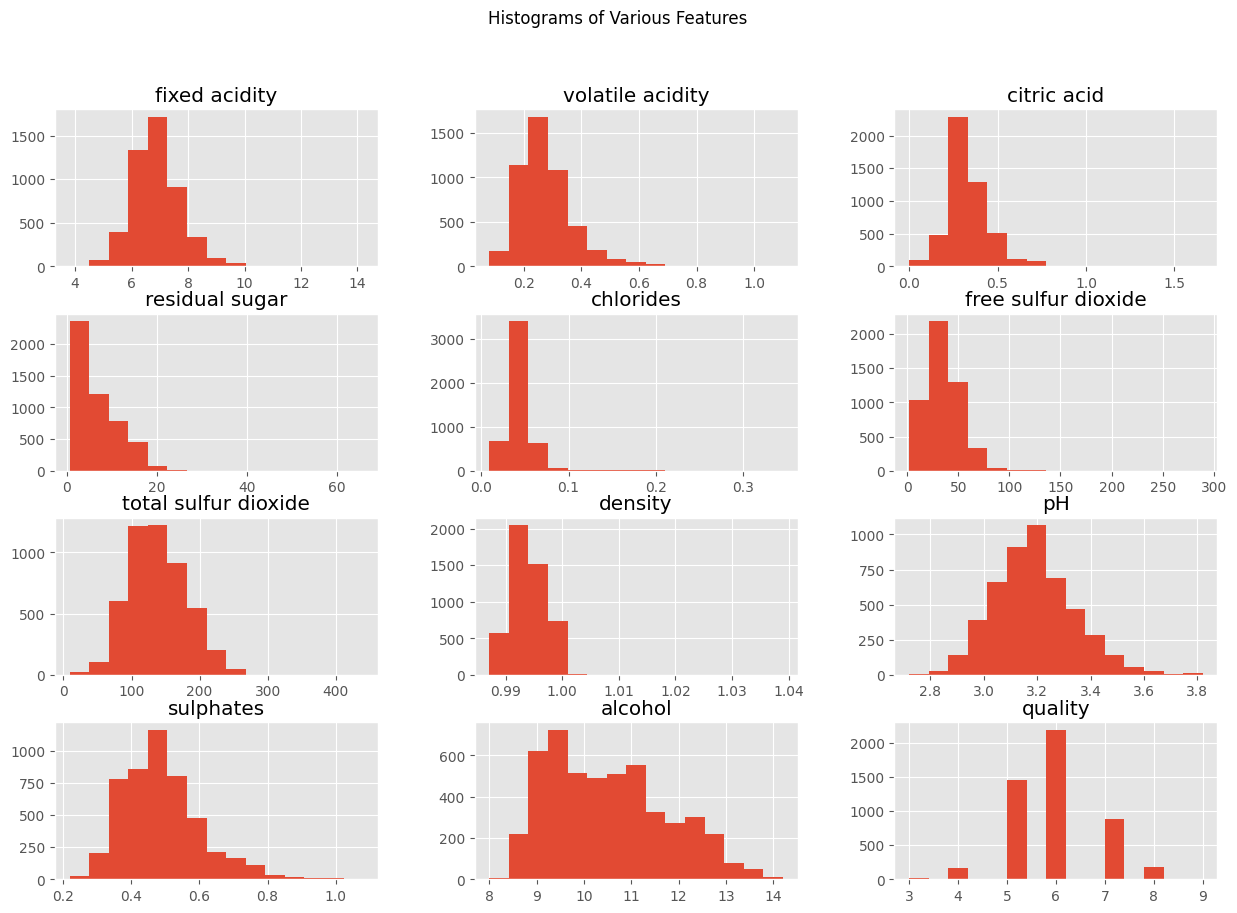

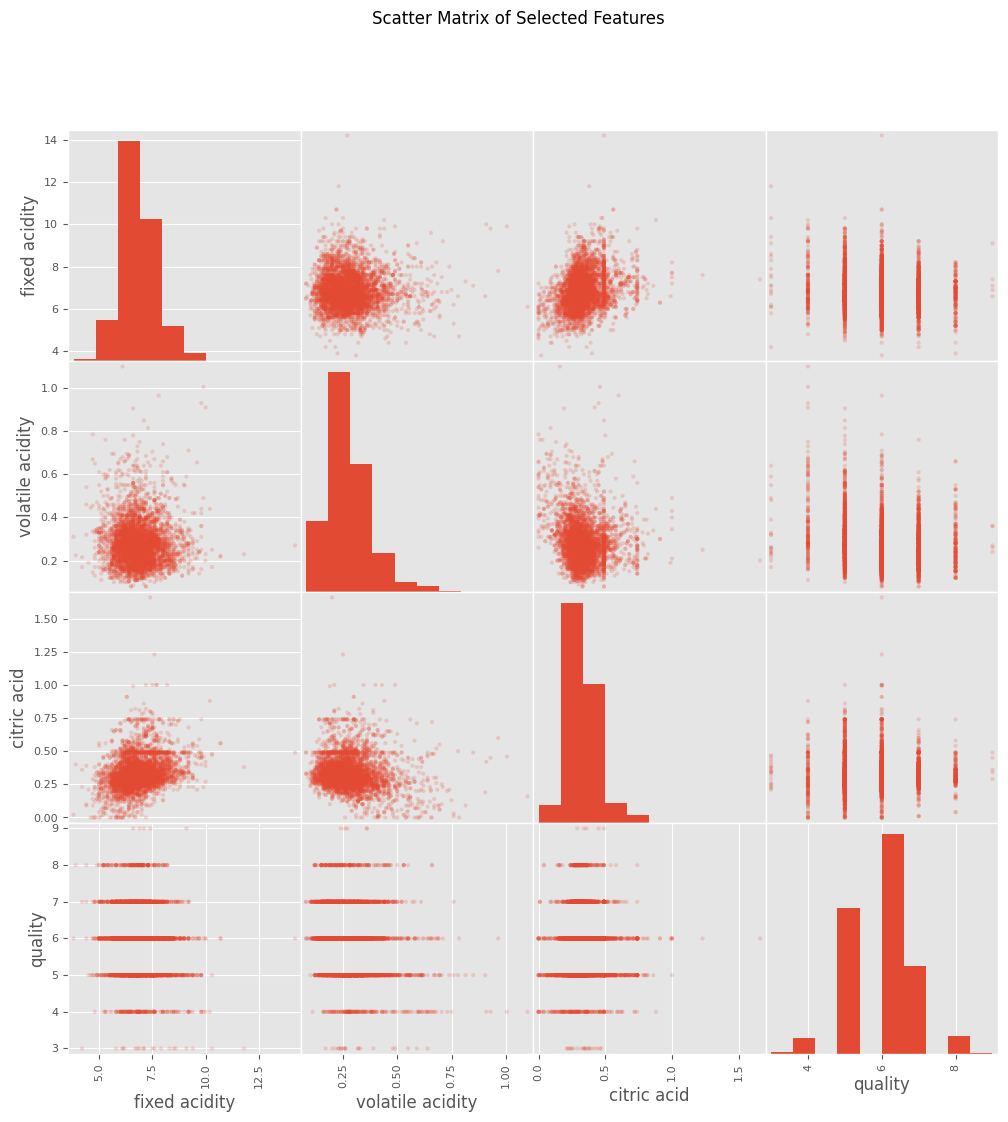

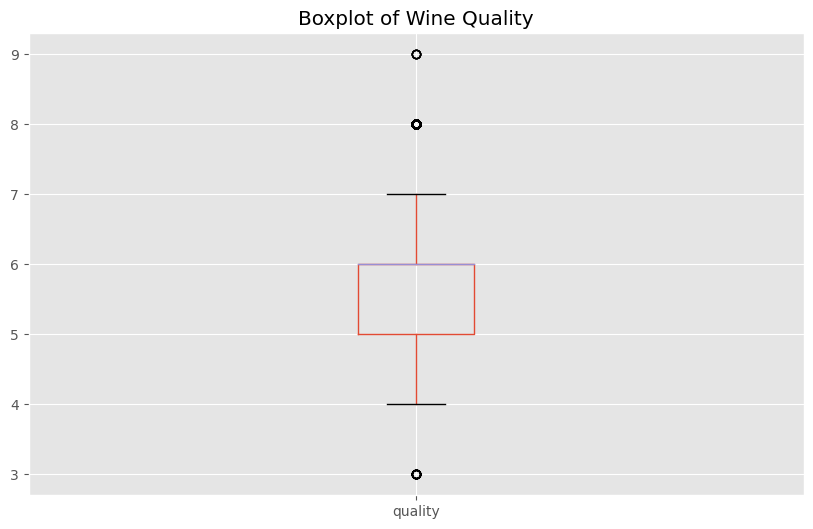

In [ ]:
data = pd.read_csv('winequality-white.csv', delimiter=';')

print(data.head())
print(data.info())

data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Various Features")
plt.show()

pd.plotting.scatter_matrix(data[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']], figsize=(12, 12), alpha=0.2)
plt.suptitle("Scatter Matrix of Selected Features")
plt.show()

plt.figure(figsize=(10, 6))
data.boxplot(column=['quality'])
plt.title("Boxplot of Wine Quality")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = data.drop(columns=['quality'])

y = data['quality'].apply(lambda x: 1 if x in [6, 7, 8] else 0)

X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)




In [ ]:
class PyTorch_NN(nn.Module):
    def __init__(self):
        super(PyTorch_NN, self).__init__()
        self.m1 = nn.Linear(11, 13)
        self.fc1 = nn.Linear(13, 11)
        self.m2 = nn.Linear(11, 9)
        self.fc2 = nn.Linear(9, 2)

    def forward(self, x):
        x = torch.relu(self.m1(x))
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.m2(x))
        x = self.fc2(x)
        return x


model = PyTorch_NN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:

def train(model, criterion, optimizer, X_train, y_train, num_epochs):
    for epoch in range(num_epochs):

        outputs = model(X_train)
        loss = criterion(outputs, y_train)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


train(model, criterion, optimizer, X_train, y_train, num_epochs=1000)


Epoch [100/1000], Loss: 0.5557
Epoch [200/1000], Loss: 0.4666
Epoch [300/1000], Loss: 0.4484
Epoch [400/1000], Loss: 0.4342
Epoch [500/1000], Loss: 0.4194
Epoch [600/1000], Loss: 0.4091
Epoch [700/1000], Loss: 0.3990
Epoch [800/1000], Loss: 0.3899
Epoch [900/1000], Loss: 0.3836
Epoch [1000/1000], Loss: 0.3800


In [ ]:
def evaluate(model, X_test, y_test):
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs.data, 1)
        total = y_test.size(0)
        correct = (predicted == y_test).sum().item()
        accuracy = 100 * correct / total
        print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

evaluate(model, X_test, y_test)


Accuracy of the model on the test set: 76.22%
